## Chapter 18:  qRAM

In quantum machine learning domain the usage of quantum random access memory \index{quantum random access memory} ($qRAM$)  is proposed to 
avoid input destruction problem (ID problem)

 A $qRAM$ queries a register $|i \rangle$ and load the $i$th binary patter into the second register
\begin{equation}
| i \rangle |0 \rangle \rightarrow | i \rangle |x^i \rangle,
\end{equation}
with $|x^i \rangle$ being a basis state representing a binary vector. Such an operation can be executed in parallel with
\begin{equation}
\frac{1}{\sqrt{m}}  \sum_ {i=1}^m  | i \rangle |0 \rangle \rightarrow \frac{1}{\sqrt{n}}  \sum_ {i=1}^m   | i \rangle |x^i \rangle,
\end{equation}
with the time complexity ignoring the preparation cost of (due to the input problem) is $O(\log(m))$.

The method  of $qRAM$ is related to the entanglement of the index qubits that are in the superposition with the patterns. As in the method  of the entanglement of the index qubits the qubits of $qRAM$  are entangled during the reading operation and have to be un-computed after computation. An example of the $qRAM$ 

In [4]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [5]:
qc = QuantumCircuit(9)
#address
#0-1
#Routing 
#2-5
#Memory
#6-8
#address
qc.h(0) #two first elements of the memory
#Routing operation
#The addresses are ordered  00, 01, 10, 11
qc.barrier()
qc.x(0)
qc.x(1)
qc.ccx(0,1,2)
qc.x(1)
qc.x(0)
qc.barrier()
qc.x(1)
qc.ccx(0,1,3)
qc.x(1)
qc.barrier()
qc.x(0)
qc.ccx(0,1,4)
qc.x(0)
qc.barrier()
qc.ccx(0,1,5)
qc.barrier()
#Memory cells 6-8
#First memory cell
qc.barrier()
qc.cx(2,6)
qc.cx(2,8)
#Second memory cell
qc.barrier()
qc.cx(3,6)
qc.cx(3,7)
#Third memory cell
qc.barrier()
qc.cx(4,6)
qc.cx(4,7)
qc.cx(4,8)
#Fourth memory cell
qc.barrier()
qc.cx(5,7)

qc.draw(fold=160)

┌───┐ ░ ┌───┐     ┌───┐ ░                 ░ ┌───┐     ┌───┐ ░       ░  ░            ░            ░                 ░      
q_0: ┤ H ├─░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░───■───░──░────────────░────────────░─────────────────░──────
     └───┘ ░ ├───┤  │  ├───┤ ░ ┌───┐  │  ┌───┐ ░ └───┘  │  └───┘ ░   │   ░  ░            ░            ░                 ░      
q_1: ──────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░───■───░──░────────────░────────────░─────────────────░──────
           ░ └───┘┌─┴─┐└───┘ ░ └───┘  │  └───┘ ░        │        ░   │   ░  ░            ░            ░                 ░      
q_2: ──────░──────┤ X ├──────░────────┼────────░────────┼────────░───┼───░──░───■────■───░────────────░─────────────────░──────
           ░      └───┘      ░      ┌─┴─┐      ░        │        ░   │   ░  ░   │    │   ░            ░                 ░      
q_3: ──────░─────────────────░──────┤ X ├──────░────────┼────────░───┼───░──░───┼────┼───░───■────■───░─────────────────░──────
           ░                 ░      └───┘      ░      ┌─┴─┐      ░   │   ░  ░   │    │   ░   │    │   ░                 ░      
q_4: ──────░─────────────────░─────────────────░──────┤ X ├──────░───┼───░──░───┼────┼───░───┼────┼───░───■────■────■───░──────
           ░                 ░                 ░      └───┘      ░ ┌─┴─┐ ░  ░   │    │   ░   │    │   ░   │    │    │   ░      
q_5: ──────░─────────────────░─────────────────░─────────────────░─┤ X ├─░──░───┼────┼───░───┼────┼───░───┼────┼────┼───░───■──
           ░                 ░                 ░                 ░ └───┘ ░  ░ ┌─┴─┐  │   ░ ┌─┴─┐  │   ░ ┌─┴─┐  │    │   ░   │  
q_6: ──────░─────────────────░─────────────────░─────────────────░───────░──░─┤ X ├──┼───░─┤ X ├──┼───░─┤ X ├──┼────┼───░───┼──
           ░                 ░                 ░                 ░       ░  ░ └───┘  │   ░ └───┘┌─┴─┐ ░ └───┘┌─┴─┐  │   ░ ┌─┴─┐
q_7: ──────░─────────────────░─────────────────░─────────────────░───────░──░────────┼───░──────┤ X ├─░──────┤ X ├──┼───░─┤ X ├
           ░                 ░                 ░                 ░       ░  ░      ┌─┴─┐ ░      └───┘ ░      └───┘┌─┴─┐ ░ └───┘
q_8: ──────░─────────────────░─────────────────░─────────────────░───────░──░──────┤ X ├─░────────────░───────────┤ X ├─░──────
           ░                 ░                 ░                 ░       ░  ░      └───┘ ░            ░           └───┘ ░

$qRAM$ circuit: address is represented by qubits $0$ and $1$, routing by qubits $2$ to $5$ and the memory by qubits  $6$ to $8$. The addresses are ordered  $00$, $01$, $10$ and for the last pattern $11$.

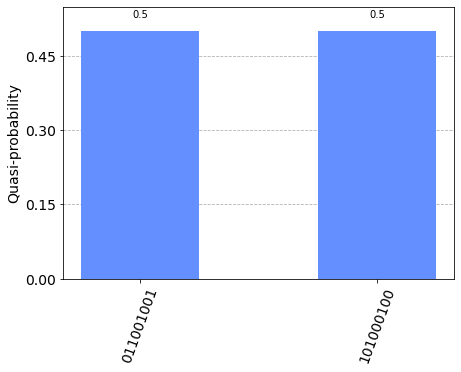

In [6]:
simulator = Aer.get_backend('statevector_simulator')
result=execute(qc,simulator).result()
counts = result.get_counts()
plot_histogram(counts)

 The address corresponds to the first qubit in superposition, address $00$ and $01$. The first and the second pattern are recalled.